# Artificial Intelligence Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# A.I. Stock
symbols = ['TCEHY','NVDA','MSFT','TWLO','AMZN','GOOGL','NFLX','CRM','DE','SPLK','VERI','SNPS','QUIK','BRN.AX']
start = '2016-01-01'
end = '2019-12-28'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
3 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

1453

In [7]:
df.head()

,TCEHY,NVDA,MSFT,TWLO,AMZN,GOOGL,NFLX,CRM,DE,SPLK,VERI,SNPS,QUIK,BRN.AX
Date,,,,,,,,,,,,,,
2016-01-04,18.936167,31.724598,50.536495,NaN,636.989990,759.440002,109.959999,76.709999,70.244408,57.650002,NaN,44.919998,17.639999,0.24090
2016-01-05,18.886673,32.234219,50.767044,NaN,633.789978,761.530029,107.660004,77.050003,70.650658,57.200001,NaN,44.970001,19.320000,0.23627
2016-01-06,18.470930,30.901340,49.844841,NaN,632.650024,759.330017,117.680000,76.290001,69.856628,55.189999,NaN,44.310001,17.080000,0.23627
2016-01-07,17.728529,29.676266,48.111115,NaN,607.940002,741.000000,114.559998,74.300003,69.238022,52.980000,NaN,43.279999,17.080000,0.24554
2016-01-08,17.787920,29.039225,48.258663,NaN,607.049988,730.909973,111.389999,73.230003,68.102364,52.009998,NaN,42.349998,16.799999,0.23164


In [8]:
df.tail()

,TCEHY,NVDA,MSFT,TWLO,AMZN,GOOGL,NFLX,CRM,DE,SPLK,VERI,SNPS,QUIK,BRN.AX
Date,,,,,,,,,,,,,,
2019-12-20,48.150002,239.369995,157.410004,100.260002,1786.500000,1351.219971,336.899994,164.550003,174.649994,150.960007,2.61,139.880005,4.62,0.0420
2019-12-23,48.459999,238.820007,157.410004,100.389999,1793.000000,1350.630005,333.100006,163.740005,175.050003,150.050003,2.60,139.910004,4.20,0.0425
2019-12-24,48.340000,238.619995,157.380005,100.550003,1789.209961,1344.430054,333.200012,163.250000,174.500000,150.350006,2.64,138.210007,4.06,0.0420
2019-12-26,48.810001,239.190002,158.669998,102.610001,1868.770020,1362.469971,332.630005,164.509995,174.800003,151.919998,2.52,140.070007,4.43,NaN
2019-12-27,49.240002,236.869995,158.960007,100.430000,1869.800049,1354.640015,329.089996,164.979996,175.809998,151.509995,2.55,140.619995,4.58,0.0440


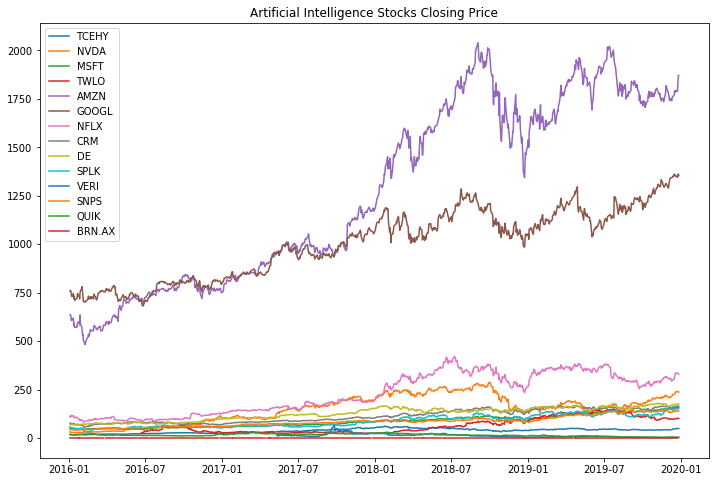

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Artificial Intelligence Stocks Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

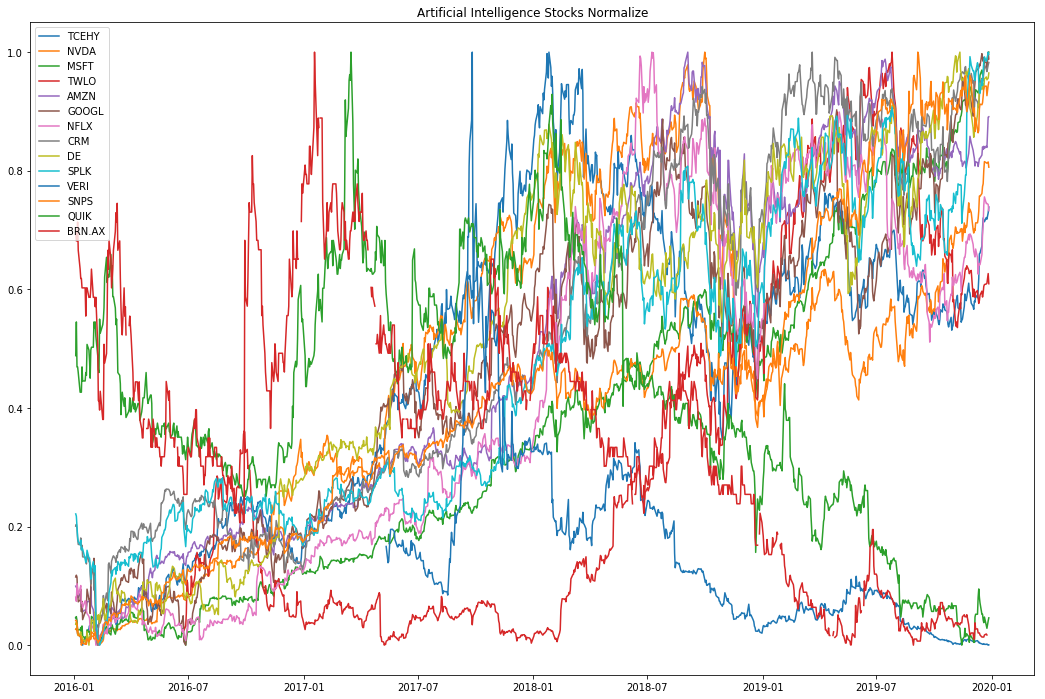

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Artificial Intelligence Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

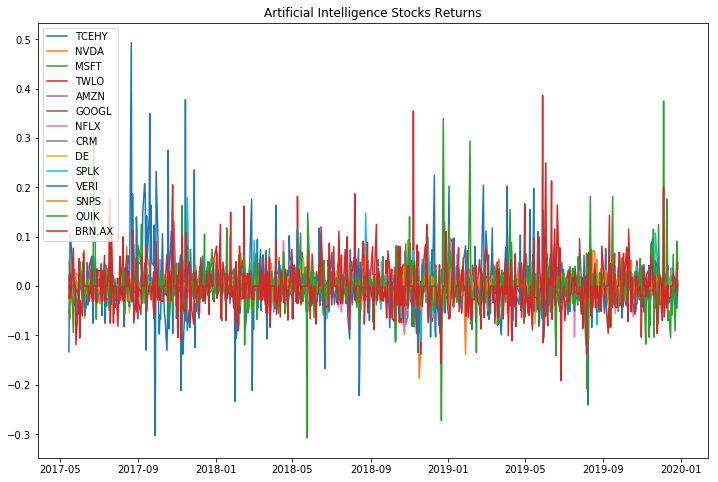

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Artificial Intelligence Stocks Returns')
plt.legend(labels=stock_rets.columns)

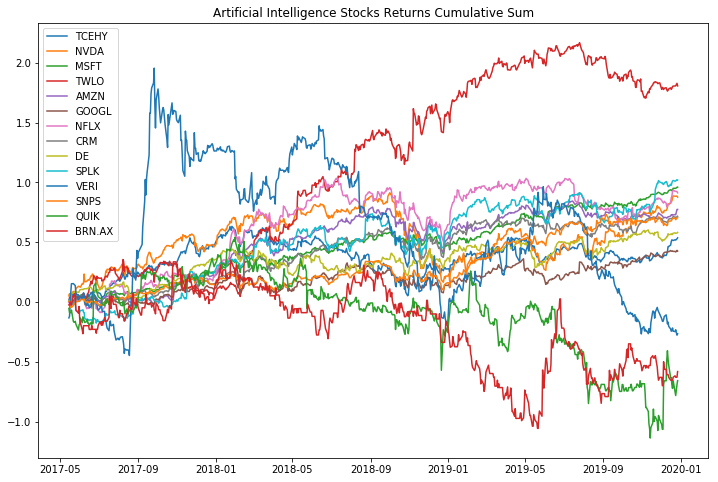

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Artificial Intelligence Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

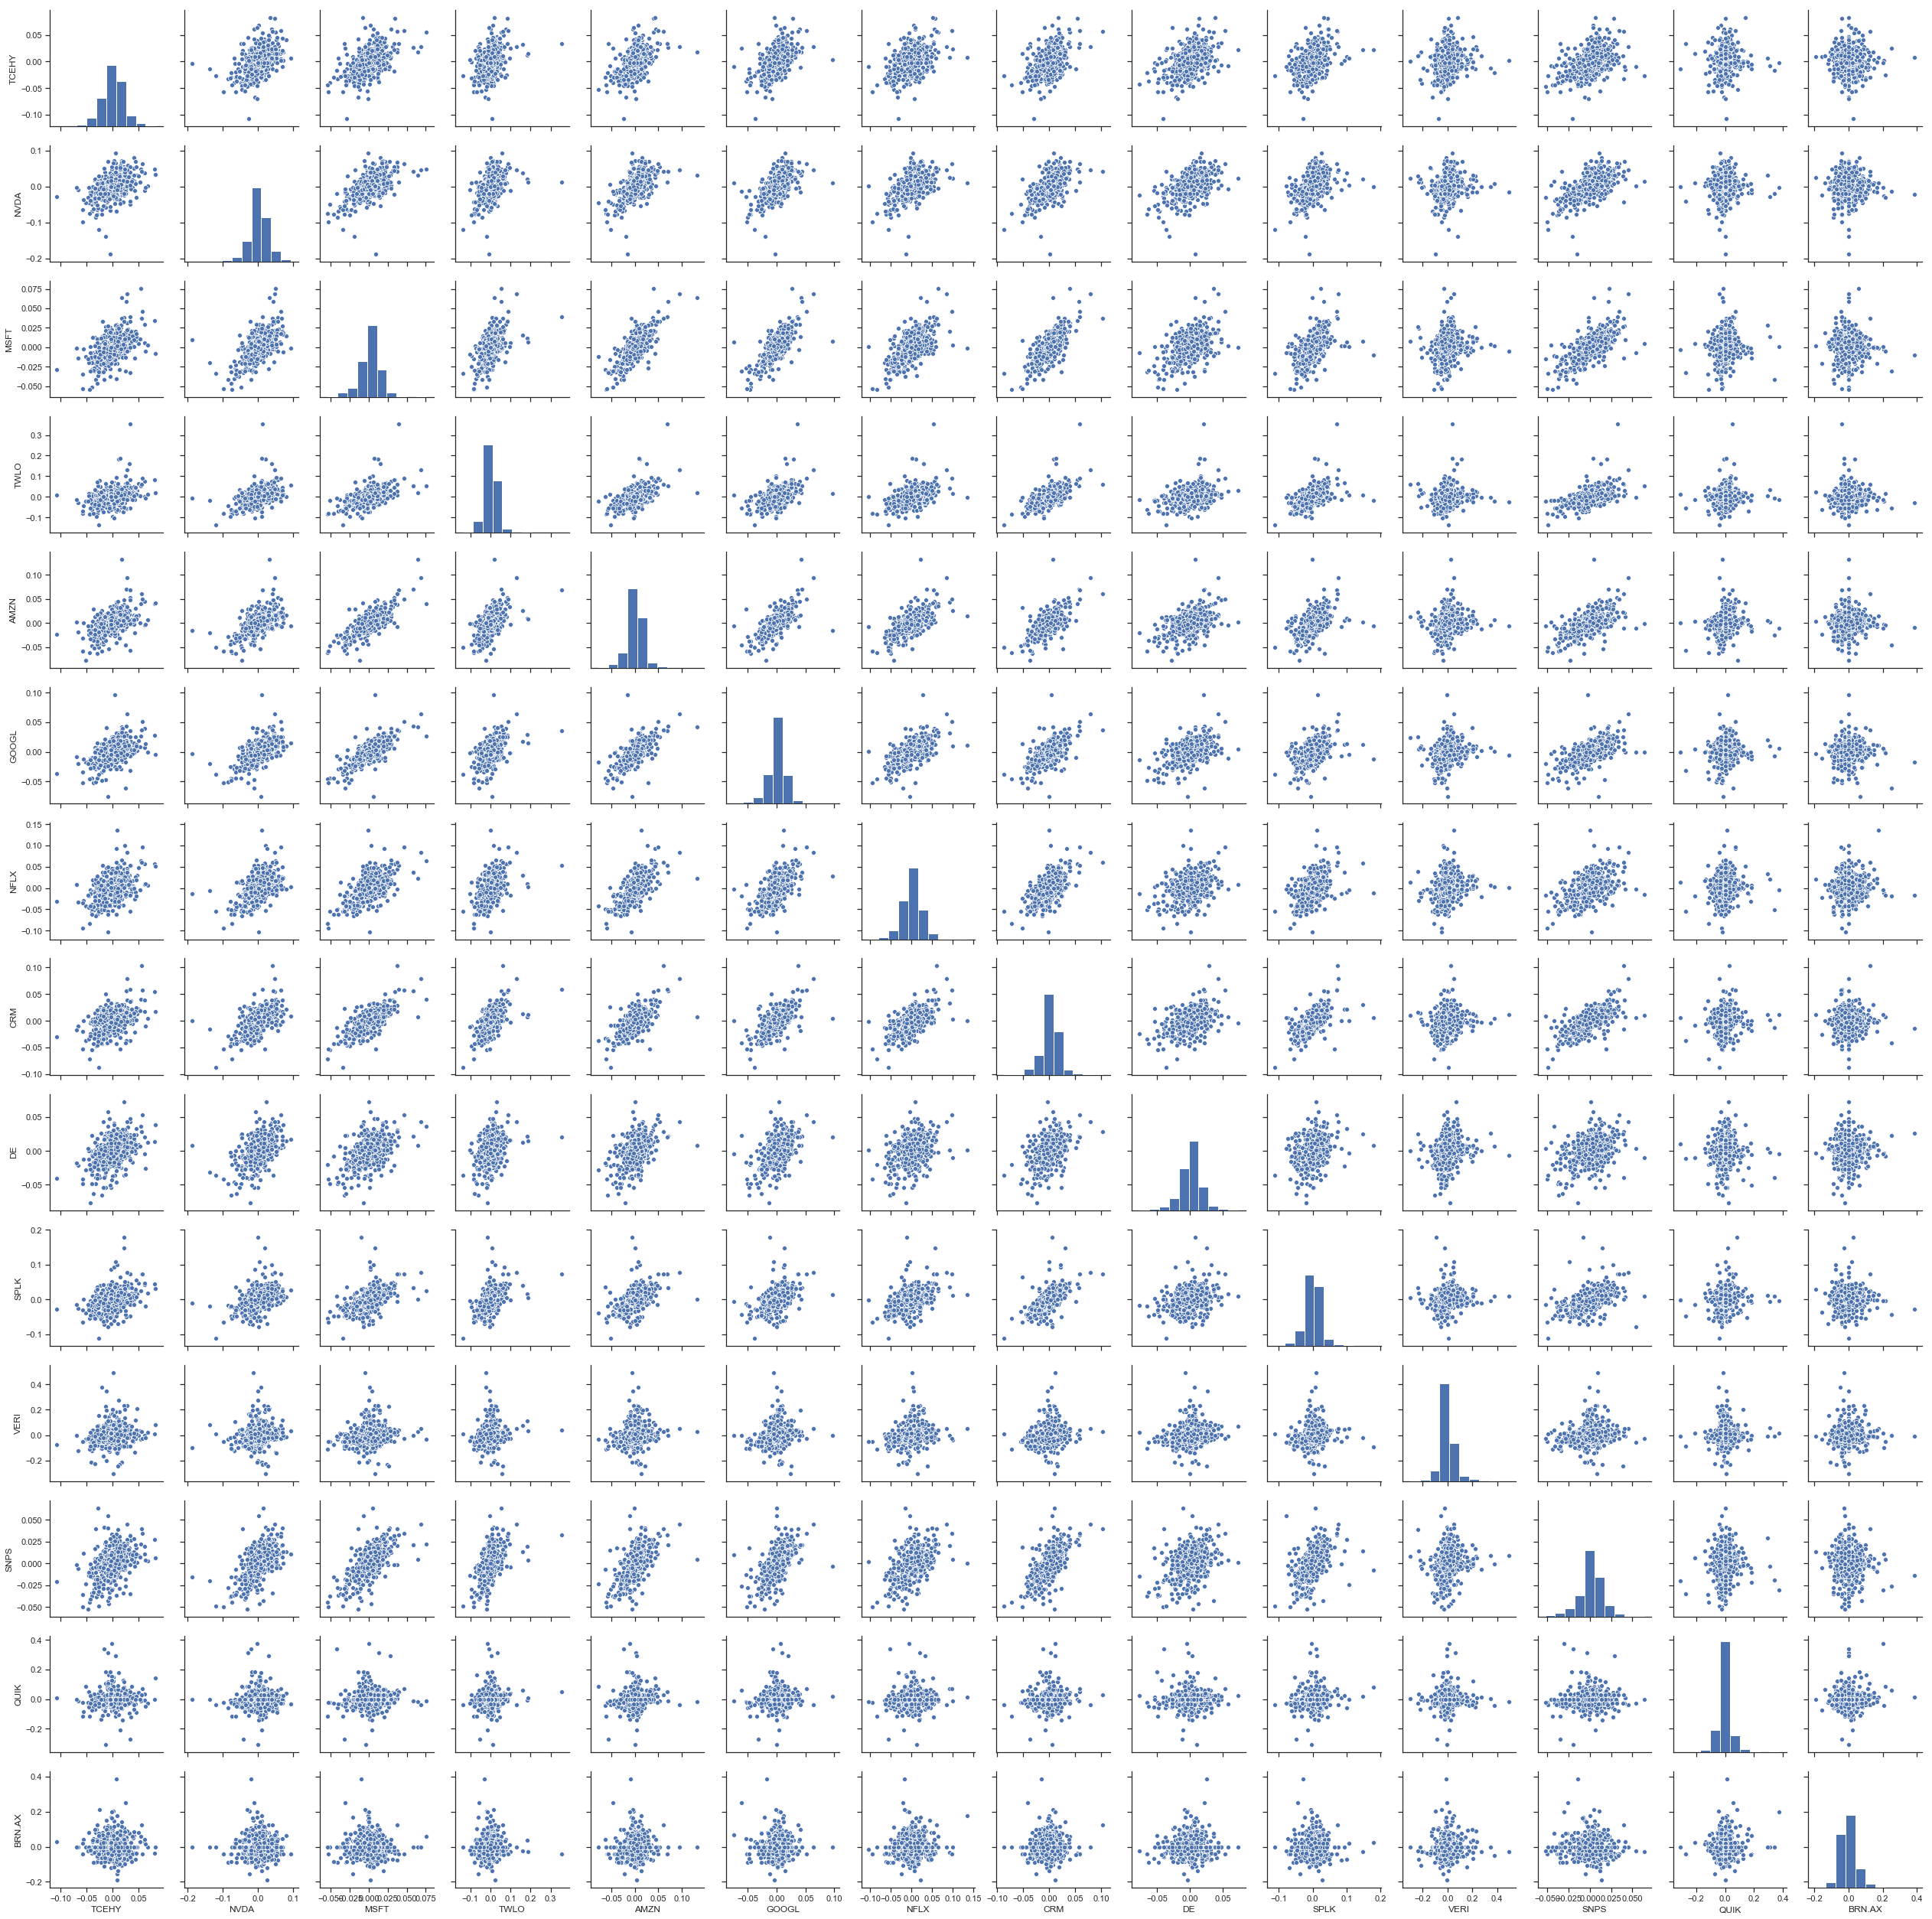

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

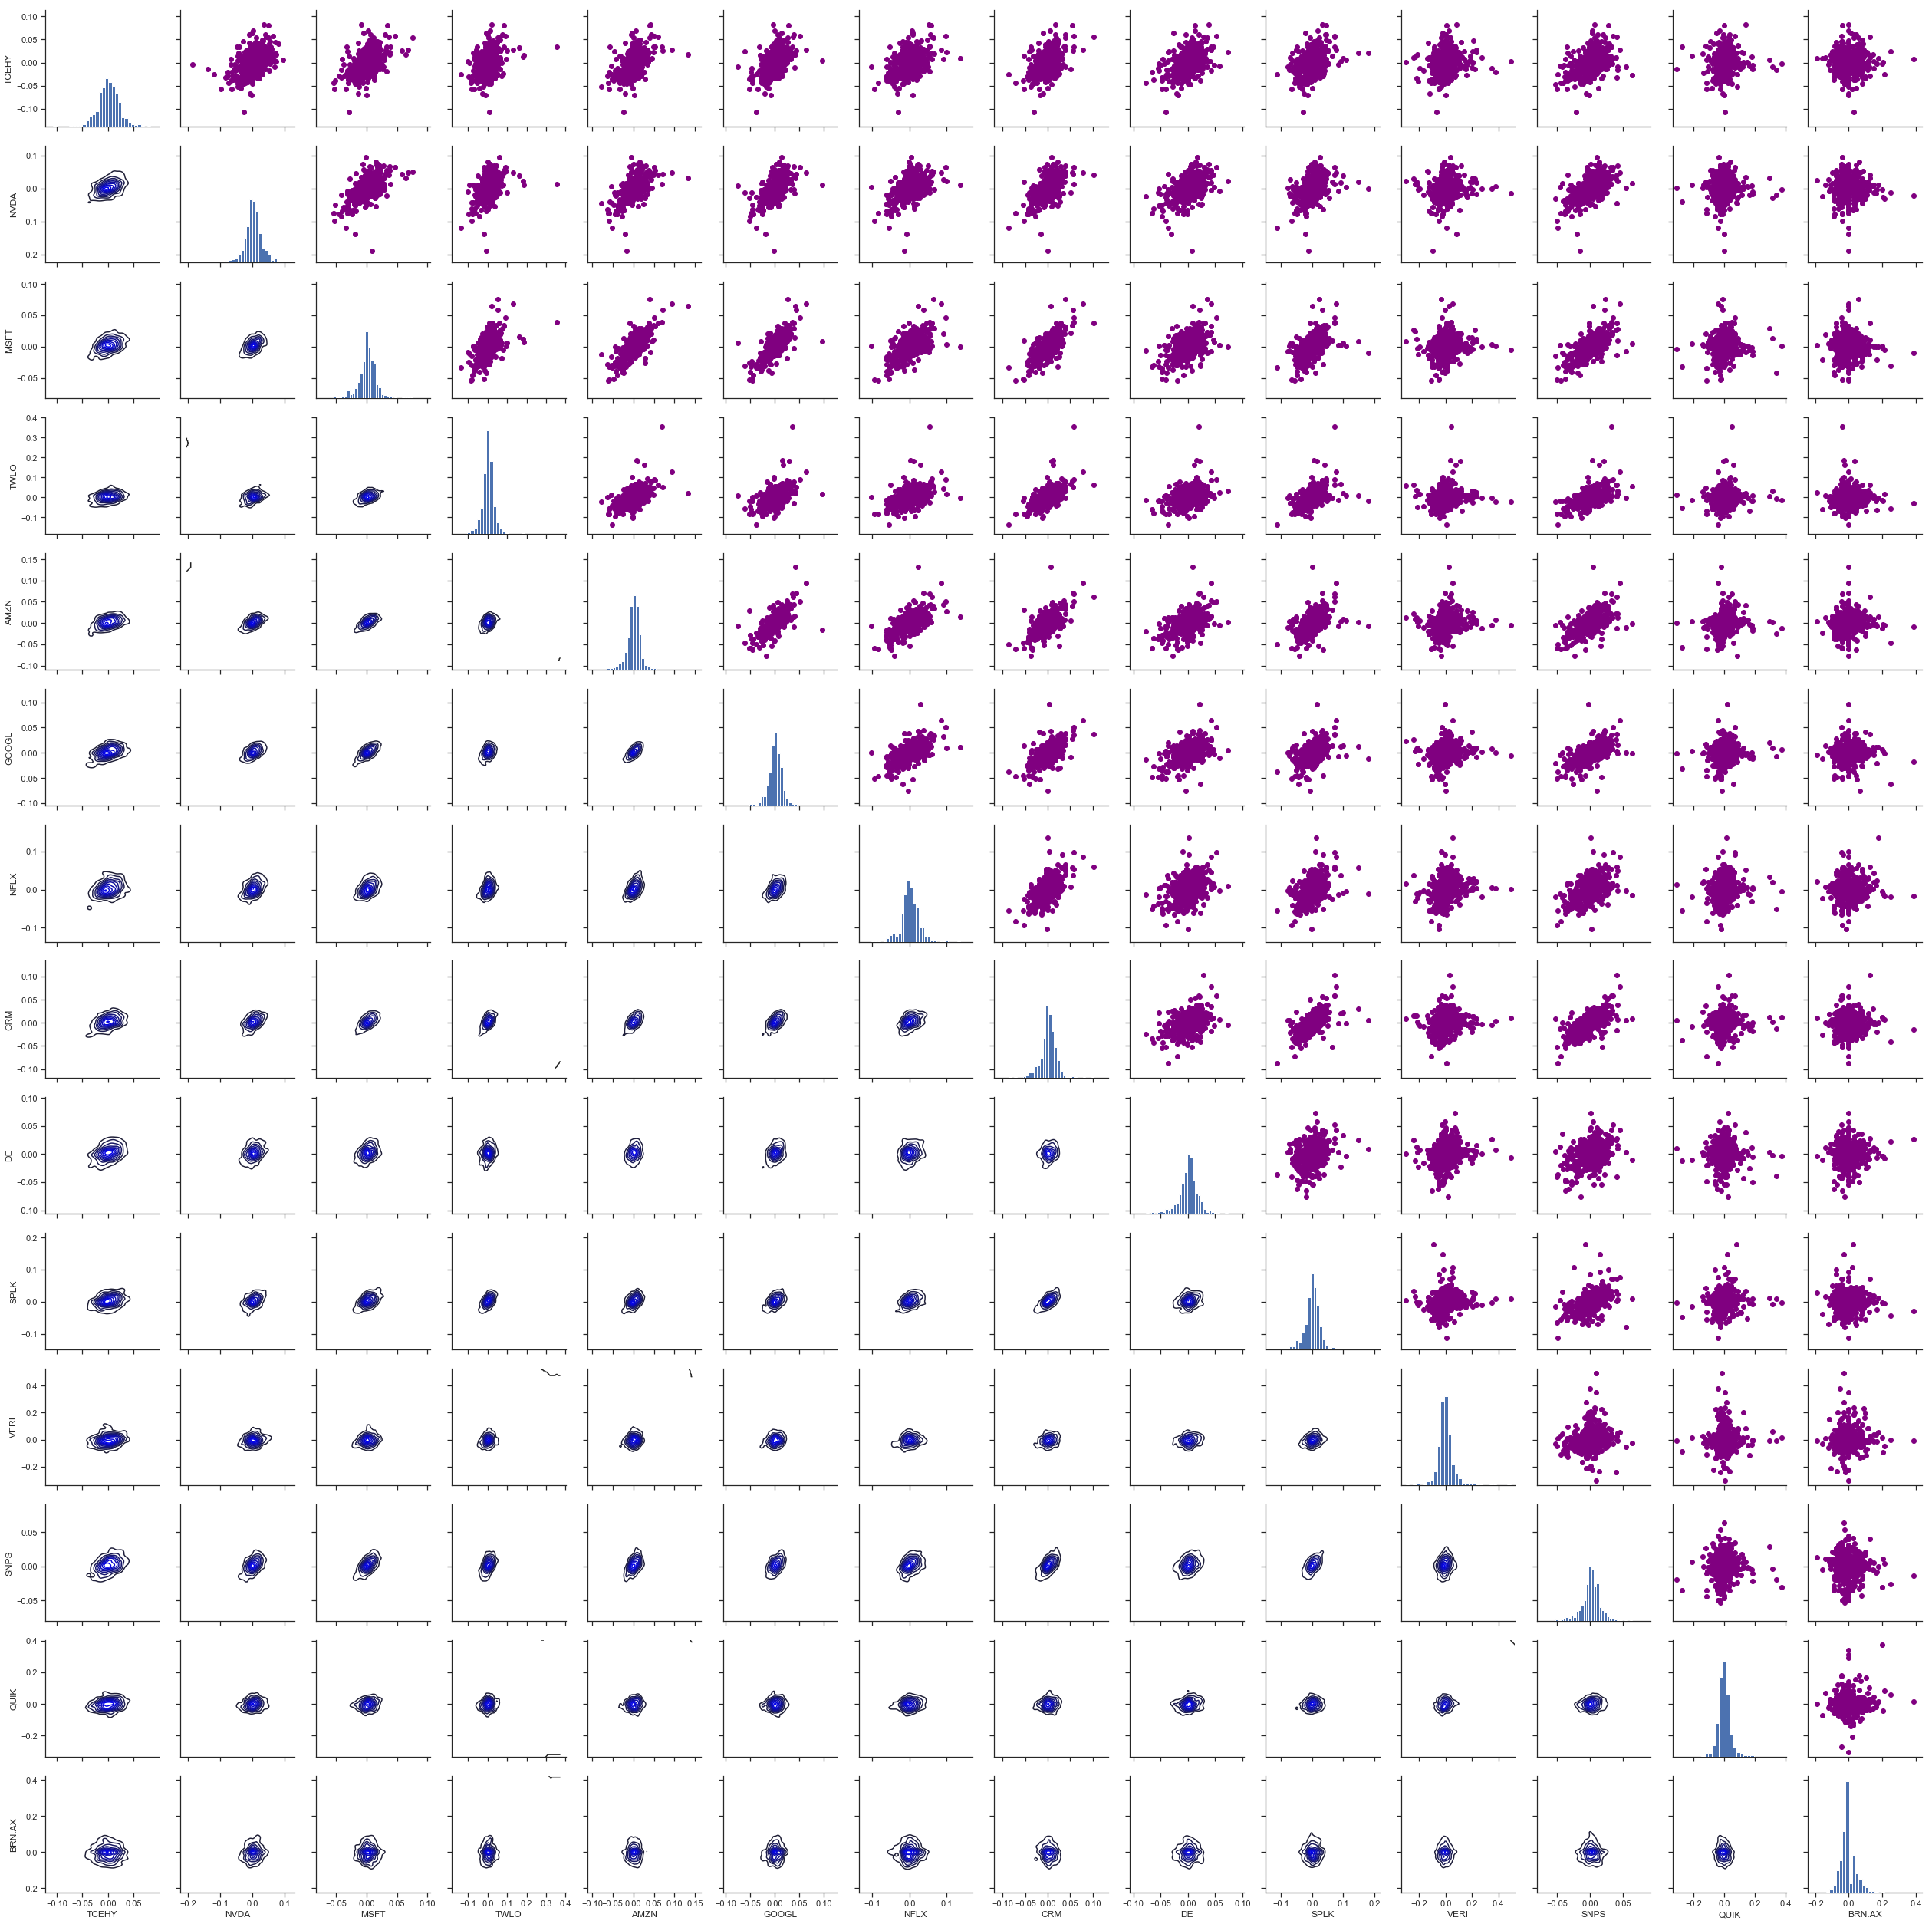

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

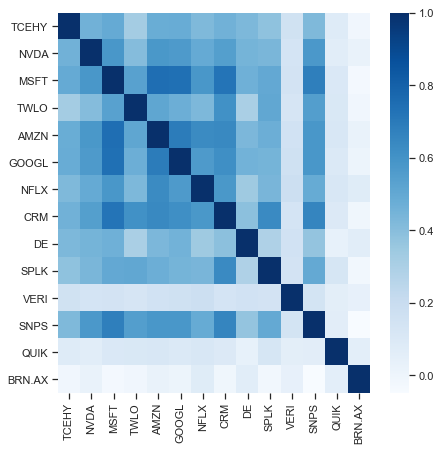

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

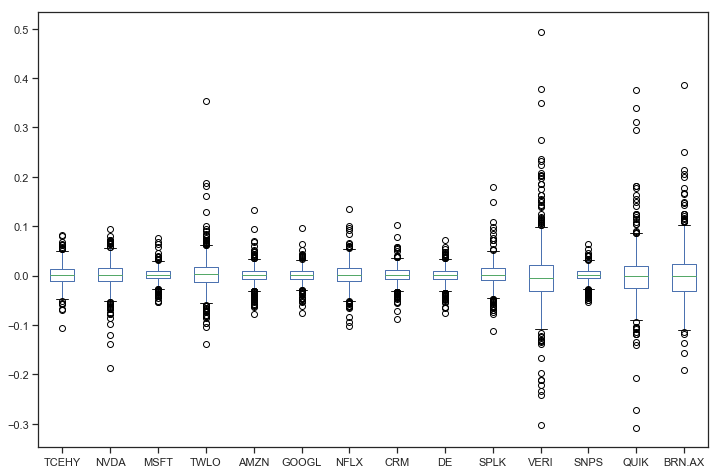

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

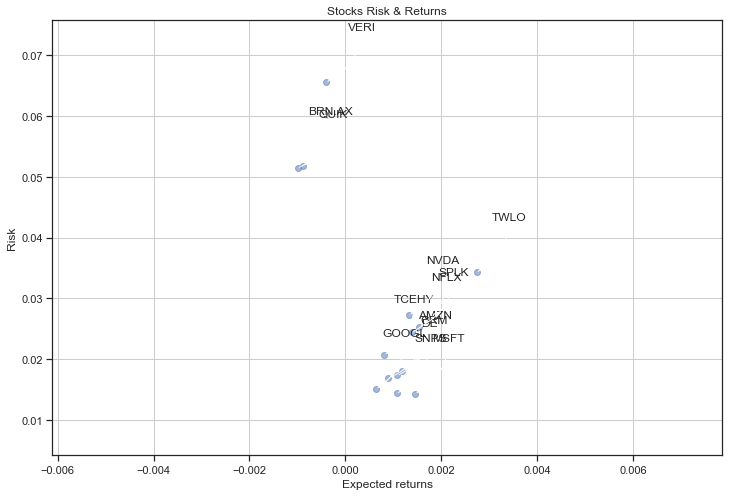

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

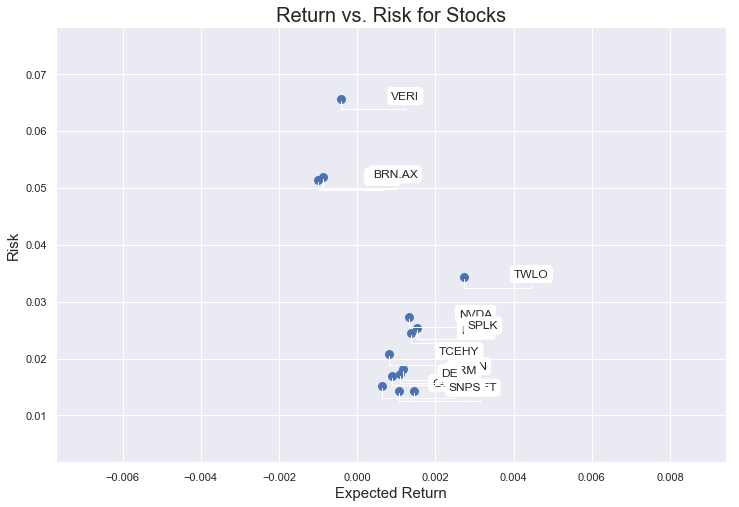

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

BRN.AX  BRN.AX    1.000000
QUIK    QUIK      1.000000
NVDA    NVDA      1.000000
MSFT    MSFT      1.000000
TWLO    TWLO      1.000000
AMZN    AMZN      1.000000
GOOGL   GOOGL     1.000000
NFLX    NFLX      1.000000
CRM     CRM       1.000000
DE      DE        1.000000
SPLK    SPLK      1.000000
VERI    VERI      1.000000
SNPS    SNPS      1.000000
TCEHY   TCEHY     1.000000
AMZN    MSFT      0.749717
MSFT    AMZN      0.749717
        GOOGL     0.741069
GOOGL   MSFT      0.741069
MSFT    CRM       0.723773
CRM     MSFT      0.723773
AMZN    GOOGL     0.693280
GOOGL   AMZN      0.693280
MSFT    SNPS      0.680529
SNPS    MSFT      0.680529
        CRM       0.659417
CRM     SNPS      0.659417
AMZN    CRM       0.640889
CRM     AMZN      0.640889
SPLK    CRM       0.635718
CRM     SPLK      0.635718
                    ...   
QUIK    NVDA      0.066894
NVDA    QUIK      0.066894
QUIK    SNPS      0.063031
SNPS    QUIK      0.063031
QUIK    VERI      0.057122
VERI    QUIK      0.057122
Q

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,TCEHY,NVDA,MSFT,TWLO,AMZN,GOOGL,NFLX,CRM,DE,SPLK,VERI,SNPS,QUIK,BRN.AX
Date,,,,,,,,,,,,,,
2017-05-15,0.604207,0.845541,0.423468,0.305080,0.355014,0.463089,0.410687,0.503740,0.552379,0.431741,0.213241,0.514984,0.371527,0.288117
2017-05-16,0.543056,0.733211,0.572682,0.328186,0.411922,0.470960,0.415309,0.455829,0.570345,0.411476,0.397156,0.470888,0.398390,0.331400
2017-05-17,0.541203,0.430727,0.204026,0.273956,0.266867,0.302275,0.267741,0.346623,0.420149,0.252423,0.514054,0.255375,0.450704,0.375793
2017-05-18,0.673671,0.815984,0.444054,0.243629,0.440813,0.489778,0.499835,0.453364,0.478520,0.339598,0.499247,0.162781,0.450704,0.288117
2017-05-19,0.680667,0.749147,0.415574,0.345561,0.378423,0.463642,0.466913,0.437746,1.000000,0.417436,0.470014,0.459793,0.483255,0.331400


In [23]:
Normalized_Value.corr()

,TCEHY,NVDA,MSFT,TWLO,AMZN,GOOGL,NFLX,CRM,DE,SPLK,VERI,SNPS,QUIK,BRN.AX
TCEHY,1.000000,0.461313,0.495002,0.327239,0.480675,0.486139,0.423656,0.460030,0.426640,0.382437,0.158167,0.423648,0.085437,-0.009593
NVDA,0.461313,1.000000,0.582348,0.406732,0.579325,0.566149,0.492555,0.545321,0.448220,0.434418,0.138721,0.575646,0.066894,0.027138
MSFT,0.495002,0.582348,1.000000,0.533268,0.749717,0.741069,0.582075,0.723773,0.466336,0.501719,0.144108,0.680529,0.102503,-0.027661
TWLO,0.327239,0.406732,0.533268,1.000000,0.512671,0.473900,0.426523,0.609668,0.303066,0.505737,0.127248,0.550771,0.108106,-0.010263
AMZN,0.480675,0.579325,0.749717,0.512671,1.000000,0.693280,0.631191,0.640889,0.430530,0.473525,0.152899,0.582122,0.118188,0.027664
GOOGL,0.486139,0.566149,0.741069,0.473900,0.693280,1.000000,0.567633,0.616621,0.457178,0.447449,0.165993,0.585296,0.098187,0.009283
NFLX,0.423656,0.492555,0.582075,0.426523,0.631191,0.567633,1.000000,0.579740,0.341174,0.441888,0.181313,0.488839,0.117592,0.075573
CRM,0.460030,0.545321,0.723773,0.609668,0.640889,0.616621,0.579740,1.000000,0.391727,0.635718,0.138729,0.659417,0.094335,-0.005423
DE,0.426640,0.448220,0.466336,0.303066,0.430530,0.457178,0.341174,0.391727,1.000000,0.286567,0.152714,0.371667,0.036152,0.067035
SPLK,0.382437,0.434418,0.501719,0.505737,0.473525,0.447449,0.441888,0.635718,0.286567,1.000000,0.143642,0.499238,0.126354,-0.014774


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

BRN.AX  BRN.AX    1.000000
QUIK    QUIK      1.000000
NVDA    NVDA      1.000000
MSFT    MSFT      1.000000
TWLO    TWLO      1.000000
AMZN    AMZN      1.000000
GOOGL   GOOGL     1.000000
NFLX    NFLX      1.000000
CRM     CRM       1.000000
DE      DE        1.000000
SPLK    SPLK      1.000000
VERI    VERI      1.000000
SNPS    SNPS      1.000000
TCEHY   TCEHY     1.000000
AMZN    MSFT      0.749717
MSFT    AMZN      0.749717
        GOOGL     0.741069
GOOGL   MSFT      0.741069
MSFT    CRM       0.723773
CRM     MSFT      0.723773
AMZN    GOOGL     0.693280
GOOGL   AMZN      0.693280
MSFT    SNPS      0.680529
SNPS    MSFT      0.680529
        CRM       0.659417
CRM     SNPS      0.659417
AMZN    CRM       0.640889
CRM     AMZN      0.640889
SPLK    CRM       0.635718
CRM     SPLK      0.635718
                    ...   
QUIK    NVDA      0.066894
NVDA    QUIK      0.066894
QUIK    SNPS      0.063031
SNPS    QUIK      0.063031
QUIK    VERI      0.057122
VERI    QUIK      0.057122
Q

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
TCEHY     0.000811
NVDA      0.001325
MSFT      0.001452
TWLO      0.002733
AMZN      0.001170
GOOGL     0.000644
NFLX      0.001380
CRM       0.001084
DE        0.000880
SPLK      0.001542
VERI     -0.000402
SNPS      0.001067
QUIK     -0.000995
BRN.AX   -0.000880
dtype: float64
--------------------------------------------------
Stock risks:
TCEHY     0.020757
NVDA      0.027282
MSFT      0.014360
TWLO      0.034306
AMZN      0.018133
GOOGL     0.015159
NFLX      0.024406
CRM       0.017334
DE        0.016866
SPLK      0.025274
VERI      0.065553
SNPS      0.014377
QUIK      0.051383
BRN.AX    0.051811
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
QUIK,-0.000995,0.051383
BRN.AX,-0.000880,0.051811
VERI,-0.000402,0.065553
GOOGL,0.000644,0.015159
TCEHY,0.000811,0.020757
DE,0.000880,0.016866
SNPS,0.001067,0.014377
CRM,0.001084,0.017334
AMZN,0.001170,0.018133
NVDA,0.001325,0.027282


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
MSFT,0.001452,0.014360
SNPS,0.001067,0.014377
GOOGL,0.000644,0.015159
DE,0.000880,0.016866
CRM,0.001084,0.017334
AMZN,0.001170,0.018133
TCEHY,0.000811,0.020757
NFLX,0.001380,0.024406
SPLK,0.001542,0.025274
NVDA,0.001325,0.027282


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
TCEHY,0.000811,0.020757,-0.442704
NVDA,0.001325,0.027282,-0.317969
MSFT,0.001452,0.014360,-0.595245
TWLO,0.002733,0.034306,-0.211827
AMZN,0.001170,0.018133,-0.486935
GOOGL,0.000644,0.015159,-0.617195
NFLX,0.001380,0.024406,-0.353175
CRM,0.001084,0.017334,-0.514396
DE,0.000880,0.016866,-0.540723
SPLK,0.001542,0.025274,-0.334653


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
TCEHY,0.000811,0.020757,-0.442704,0.083018,-0.107100,0.000786,0.880968
NVDA,0.001325,0.027282,-0.317969,0.093632,-0.187559,0.002067,-0.969943
MSFT,0.001452,0.014360,-0.595245,0.075705,-0.054338,0.001475,0.182775
TWLO,0.002733,0.034306,-0.211827,0.354407,-0.137602,0.002354,-2.124550
AMZN,0.001170,0.018133,-0.486935,0.132164,-0.078197,0.001425,0.055118
GOOGL,0.000644,0.015159,-0.617195,0.096202,-0.075019,0.001013,-0.574688
NFLX,0.001380,0.024406,-0.353175,0.135436,-0.102720,0.000590,-1.064248
CRM,0.001084,0.017334,-0.514396,0.102713,-0.087061,0.001696,0.285698
DE,0.000880,0.016866,-0.540723,0.073045,-0.076512,0.001518,0.577800
SPLK,0.001542,0.025274,-0.334653,0.178932,-0.111918,0.001420,-0.269881


In [33]:
table['Average Return Yearly'] = (1 + total_return)**(1 / number_of_years) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly
TCEHY,0.000811,0.020757,-0.442704,0.083018,-0.107100,0.000786,0.880968,0.002928
NVDA,0.001325,0.027282,-0.317969,0.093632,-0.187559,0.002067,-0.969943,-0.003244
MSFT,0.001452,0.014360,-0.595245,0.075705,-0.054338,0.001475,0.182775,0.000609
TWLO,0.002733,0.034306,-0.211827,0.354407,-0.137602,0.002354,-2.124550,-0.007133
AMZN,0.001170,0.018133,-0.486935,0.132164,-0.078197,0.001425,0.055118,0.000184
GOOGL,0.000644,0.015159,-0.617195,0.096202,-0.075019,0.001013,-0.574688,-0.001919
NFLX,0.001380,0.024406,-0.353175,0.135436,-0.102720,0.000590,-1.064248,-0.003560
CRM,0.001084,0.017334,-0.514396,0.102713,-0.087061,0.001696,0.285698,0.000951
DE,0.000880,0.016866,-0.540723,0.073045,-0.076512,0.001518,0.577800,0.001922
SPLK,0.001542,0.025274,-0.334653,0.178932,-0.111918,0.001420,-0.269881,-0.000900


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
TCEHY,0.000811,0.020757,-0.442704,0.083018,-0.107100,0.000786,0.880968,0.002928,0.180266
NVDA,0.001325,0.027282,-0.317969,0.093632,-0.187559,0.002067,-0.969943,-0.003244,0.417189
MSFT,0.001452,0.014360,-0.595245,0.075705,-0.054338,0.001475,0.182775,0.000609,0.219875
TWLO,0.002733,0.034306,-0.211827,0.354407,-0.137602,0.002354,-2.124550,-0.007133,NaN
AMZN,0.001170,0.018133,-0.486935,0.132164,-0.078197,0.001425,0.055118,0.000184,0.205338
GOOGL,0.000644,0.015159,-0.617195,0.096202,-0.075019,0.001013,-0.574688,-0.001919,0.105578
NFLX,0.001380,0.024406,-0.353175,0.135436,-0.102720,0.000590,-1.064248,-0.003560,0.209396
CRM,0.001084,0.017334,-0.514396,0.102713,-0.087061,0.001696,0.285698,0.000951,0.142038
DE,0.000880,0.016866,-0.540723,0.073045,-0.076512,0.001518,0.577800,0.001922,0.172470
SPLK,0.001542,0.025274,-0.334653,0.178932,-0.111918,0.001420,-0.269881,-0.000900,0.182443


In [35]:
table.sort_values(by='Average Return Yearly')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
TWLO,0.002733,0.034306,-0.211827,0.354407,-0.137602,0.002354,-2.124550,-0.007133,NaN
NFLX,0.001380,0.024406,-0.353175,0.135436,-0.102720,0.000590,-1.064248,-0.003560,0.209396
NVDA,0.001325,0.027282,-0.317969,0.093632,-0.187559,0.002067,-0.969943,-0.003244,0.417189
GOOGL,0.000644,0.015159,-0.617195,0.096202,-0.075019,0.001013,-0.574688,-0.001919,0.105578
SPLK,0.001542,0.025274,-0.334653,0.178932,-0.111918,0.001420,-0.269881,-0.000900,0.182443
AMZN,0.001170,0.018133,-0.486935,0.132164,-0.078197,0.001425,0.055118,0.000184,0.205338
MSFT,0.001452,0.014360,-0.595245,0.075705,-0.054338,0.001475,0.182775,0.000609,0.219875
CRM,0.001084,0.017334,-0.514396,0.102713,-0.087061,0.001696,0.285698,0.000951,0.142038
SNPS,0.001067,0.014377,-0.621371,0.063589,-0.052558,0.001783,0.392652,0.001307,0.218864
DE,0.000880,0.016866,-0.540723,0.073045,-0.076512,0.001518,0.577800,0.001922,0.172470
